## Analyzing Housing in Sacramento

This notebook looks into using various python-based analysis and data science libraries in an attempt to build a report to analyze housing and a simple recommendation system for housing in Sacramento

### 1. Problem definitions

> Given housing attributes, what factors make a house expensive?

### 2. Data 
> The data comes from my attempt to scrape data from Trulia:
    https://www.trulia.com/CA/Sacramento/
        
> Check the github page for more information about the scraping process

## 3. Evaluation

> Given specific criteria, can we pick the top 10 houses available?

## 4. Features

This is where you'll get different information about each of the features in your data.

* price: price of the house
* address: where the house is located
* bd&ba: number of bedroom and bathroom
* sqft: how large the house is 


## Preparing the tools

We are going to use pandas, numpy, matplotlib, and seaborn for data analysis and manipulation

In [73]:
# Import the module that we are going to be using

# Regular EDA
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


# Models from scikit-learns

## Load Data

In [74]:
df = pd.read_csv('houses.csv')
df.shape

(1125, 4)

## Data Cleaning

The goal here is to make our data cleaner for later analysis and model predicting. 
1. Do we have missing data?
2. Is all of our data clean?
- Does it have correct form?
- Do we need to remove some characters to make it cleaner

In [75]:
df.head()

,price,bd&ba,sqft,address
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831"
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834"
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834"
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815"
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828"


### Do we have missing data?

In [76]:
df.isna().sum()

price       0
bd&ba      58
sqft        0
address     0
dtype: int64

It looks like we do have some missing value. It's worth checking the trulia page to find out why?

In [77]:
df[df['bd&ba'].isna()].head(10)

,price,bd&ba,sqft,address
104,"375,000",NaN,217 Silver Eagle Rd,"217 Silver Eagle Rd,, ,Sacramento, CA 95838"
141,"439,000",NaN,7001 Garden Hwy,"7001 Garden Hwy,, ,Sacramento, CA 95837"
179,"1,755,000",NaN,270 South Ave,"270 South Ave,, ,Sacramento, CA 95838"
215,"1,755,000",NaN,260 South Ave,"260 South Ave,, ,Sacramento, CA 95838"
269,"4,550,000",NaN,4101 Taylor St,"4101 Taylor St,, ,Sacramento, CA 95838"
276,"325,000",NaN,22nd St,"22nd St,, ,Rio Linda, CA 95673"
300,"1,250,000",NaN,1 (on 3.25 acres),"6140 Lemon Hill Ave,, ,Sacramento, CA 95824"
334,"100,000",NaN,1625 Los Robles Blvd,"1625 Los Robles Blvd,, ,Sacramento, CA 95838"
373,"300,000",NaN,2009 Chinatown Aly,"2009 Chinatown Aly,, ,Sacramento, CA 95814"
391,"250,000",NaN,Branch St,"Branch St,, ,Sacramento, CA 95815"


Here's what I found:
1. All the missing values is within the "bd&ba" column. 
2. These rows are lands, not houses.
Since the scope of our project is to focus on the housing, I'm going to drop these rows

In [78]:
# Let's drop the missing rows
df.dropna(inplace=True)

# Check if we have any missing values again
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
dtype: int64

### Let's clean our data

#### 1. "bd&ba" Column

In [79]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', 'Studio,2ba', '18bd', '8bd', '5bd,7ba',
       '6bd,5ba', '6bd,6ba', '6bd,8ba'], dtype=object)

We need to separate this column into two different columns. Looking at all the unique values, there's some values that contain "Studio" instead of number of bedroom. 
According to Stefan from homedit:
> A studio appartment is basically a self-contained unit and houses everything in the single room space except the bathroom. With a studio appartment, you're getting some variation of a single large room with attached of kitchen, and a separath bathroom
And because of the difference in term of housing types as well as the difficulty of determining what number of bathroom should we replace for "Studio," I'm going to drop them as well. 

Luckily, there's only over 10 records of studio type housing in the dataset so it won't affect much 

In [80]:
# Drop studio rows
df = df[df['bd&ba'] != 'Studio,2ba']
df = df[df['bd&ba']!='Studio']

# Let's check the column value again
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', '2bd', '5bd,5ba',
       '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba', '4bd',
       '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

We're finished getting rid of the Studio type house. However, we still have rows with only bedroom number. We've got to deal with it as well. Now, let's split the column first

In [81]:
df[['bd','ba']] = df['bd&ba'].str.split(',',expand=True)

In [82]:
df.head()

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3bd,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4bd,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1bd,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3bd,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3bd,2ba


Because there were rows with missing "ba" value, it's clear that there will be some missing value in the 'ba' column

In [83]:
df.isna().sum()

price       0
bd&ba       0
sqft        0
address     0
bd          0
ba         85
dtype: int64

Let's group our data with bd and see what's the most appeared value of ba with each bd value

In [84]:
df[['bd','ba']].groupby(['bd']).agg(pd.Series.mode)

,ba
bd,
10bd,[]
18bd,[]
1bd,1ba
2bd,2ba
3bd,2ba
4bd,3ba
5bd,3ba
6bd,4ba
7bd,4ba


### Impute missing ba value

Now, let's create a function to impute missing value based on the table we just created

In [85]:
def impute_ba(cols):
    ba = cols[0]
    bd = cols[1]

    if pd.isna(ba):
        if bd == '1bd':
            return '1ba'
        elif (bd == '2bd') & (bd=='3bd'):
            return '2ba'
        elif (bd == '4bd') & (bd=='5bd'):
            return '3ba'
        elif (bd == '6bd') & (bd=='7bd'):
            return '4ba'
        else:
            return str(bd)+'ba'
        
    else:
        return ba

In [86]:
# First, let's remove 'bd' in bd column then convert it into int type
df['bd'] = df['bd'].str.replace('bd','')
df['bd'] = df['bd'].astype(int)

# Now, apply the function to our dataframe
df['ba'] = df[['ba','bd']].apply(impute_ba, axis=1)

In [87]:
# let's remove 'ba' in ba column then convert it into int type
df['ba'] = df['ba'].str.replace('ba','')
df['ba'] = df['ba'].astype(int)

Let's check our new two columns

In [88]:
df['ba'].unique()

array([ 3,  1,  2,  5,  4,  6,  8,  7, 10,  9, 18])

In [89]:
df['bd'].unique()

array([ 3,  4,  1,  2,  5,  6,  7,  8, 10, 18])

In [90]:
df.head()

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2


Now, let's drop the bd&ba column

In [91]:
df.drop('bd&ba',axis=1, inplace=True)

In [92]:
df.head()

,price,sqft,address,bd,ba
0,"689,000","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,"625,000","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,"224,500",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,"340,000","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,"399,000","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2


### Cleaning the price column

In [93]:
df['price'].unique()

array(['689,000', '625,000', '224,500', '340,000', '399,000', '180,000',
       '409,900', '545,000', '291,000', '890,000', '399,900', '459,000',
       '499,000', '549,900', '575,000', '59,900', '499,900', '555,000',
       '429,000', '565,000', '589,000', '1,295,000', '597,000', '599,900',
       '620,000', '455,500', '359,900', '599,000', '515,000', '779,900',
       '500,000', '720,000', '434,900+', '1,156,641+', '650,000',
       '998,888', '215,000', '699,900', '449,777', '425,000', '459,900',
       '349,000', '290,000', '455,000', '410,000', '549,000', '900,000',
       '375,000', '685,000', '795,000', '509,990+', '488,990+', '450,000',
       '349,999', '1,199,000', '673,490+', '472,990+', '459,900+',
       '775,000', '675,000', '760,000', '495,000', '659,999', '635,000',
       '495,500', '1,775,000', '550,000', '199,500', '480,000', '477,000',
       '535,000', '329,900', '628,000', '374,310+', '869,990+',
       '469,900+', '571,950+', '558,990+', '515,990+', '699,990+',
 

### Price column

Remove "+" and "," out of out price column then convert it into int

In [94]:
df['price'] = df['price'].str.replace(r'[,+]','')
df['price'] = df['price'].astype(int)

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [95]:
df.head(5)

,price,sqft,address,bd,ba
0,689000,"2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,625000,"2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,224500,667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,340000,"1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,399000,"1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2


### Sqft column

In [96]:
df['sqft'].unique()

array(['2,235', '2,299', '667', '1,084', '1,394', '840', '1,018', '2,013',
       '1,125', '3,420 (on 0.50 acres)', '1,149 (on 0.25 acres)', '1,324',
       '1,716', '1,584', '2,219', '1,184', '1,440', '1,697', '2,090',
       '1,160', '2,030', '1,000', '3,651', '2,442',
       '1,645 (on 0.25 acres)', '2,195', '1,838 (on 0.25 acres)', '1,193',
       '1,984', '2,097', '1,887', '1,388', '1,722',
       '1,144 (on 0.75 acres)', '1,471', '1,762', '2,225 (on 0.25 acres)',
       '1,229', '2,202', '1,165', '2,694', '682', '1,897 (on 1.75 acres)',
       '1,209', '1,686', '1,638', '1,001', '1,353', '1,272', '2,017',
       '2,517 (on 0.50 acres)', '1,008', '2,185', '1,025',
       '2,322 (on 0.25 acres)', '2,298', '1,417', '1,684', '970', '3,046',
       '2,689', '1,467', '1,434', '2,190', '2,845 (on 0.25 acres)',
       '2,517', '1,323', '1,940 (on 0.25 acres)', '1,456', '2,126',
       '2,011', '1,163', '3,856 (on 0.75 acres)', '924', '1,709', '1,593',
       '1,320', '1,261', '1,504', '7

Here is what we need to do
> 1. Remove  "(on ... acres)" part
> 2. Remove the comma
> 3. Remove rows with address instead of sqft number
> 4. Convert it into int

In [97]:
# Remove "(on ... acres)" part
df['sqft'] = df['sqft'].str.replace(r'(\s)?\(.+\)','')
# Remove the comma
df['sqft'] = df['sqft'].str.replace(',','')

# remove the lines with address instead of sqft number
pattern = '\s.+'
filter = df['sqft'].str.contains(pattern)
df = df[~filter]

# Convert it into int
df['sqft'] = df['sqft'].astype(int)

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [98]:
df.dtypes

price       int32
sqft        int32
address    object
bd          int32
ba          int32
dtype: object

### Address Column

1. Remove the three commas in the middle of the address column
2. Since we are going analyze which zipcode has the highest housing value, I'm going to create a zip column 
3. The address column will be kept for the map we are going to create

In [99]:
# Remove the three commas in the middle of the address column
df['address'] = df['address'].str.replace(',, ,',', ')

# Get the zip code column, we know that all these zip code start with 95, so we're going to cheat a little bit.
df['zip'] = df['address'].str.extract(r'(95\d{3})')

In [100]:
df.head()

,price,sqft,address,bd,ba,zip
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828


### Remove Outliers

#### Price Distribution

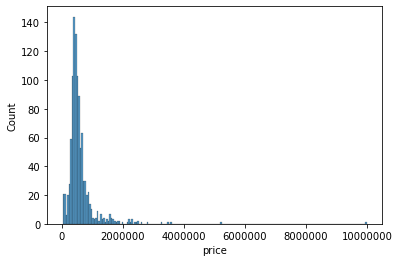

In [101]:
plt.ticklabel_format(style='plain', axis='x')
sb.histplot(data=df, x='price');

From the housing distribution, it's clear that we have some outliers, let's take a look at them and decide what to do

In [102]:
min_threshold, max_threshold = df['price'].quantile([0.05,0.95])
print(min_threshold,max_threshold)

199000.0 1341816.0


> Generally speaking, you could almost never find any houses less then 200k in California. And these rows are either mobile homes, condos, or just projects that haven't been executed
> On the other side, housing could be very expensive, espescially in California. However, it's worth notice that rows with low bd and ba number are usually not categorized as houses but lands. We are going to remove them and the ones that under the min threshold.

Houses under the min threshold (First 15 houses)

In [103]:
df[df['price']<min_threshold].head(15)

,price,sqft,address,bd,ba,zip
5,180000,840,"49 La Fresa Ct #3, Sacramento, CA 95823",2,1,95823
16,59900,1440,"4900 Arbor Dr #18, Sacramento, CA 95834",2,2,95834
136,34900,660,"7755 Whispering Palms Dr, Sacramento, CA 95823",1,1,95823
137,95000,1344,"6225 Tyee Ave, Sacramento, CA 95841",2,2,95841
139,139950,1248,"82 Amapola Ave, Sacramento, CA 95828",2,2,95828
216,84900,1056,"7548 Hazelnut Ln #94, Sacramento, CA 95828",2,2,95828
217,29900,560,"7726 Whispering Palms Dr, Sacramento, CA 95823",2,1,95823
278,79900,1440,"4206 Bouquet Way #37, Sacramento, CA 95834",2,2,95834
291,135000,1576,"206 Cooper Ave, Sacramento, CA 95823",2,2,95823
292,69000,1152,"4208 Atrium Way #52, Sacramento, CA 95834",2,2,95834


Houses above the threshold (First 15 houses)

In [104]:
df[df['price']>max_threshold].head(15) 

,price,sqft,address,bd,ba,zip
76,1775000,3856,"3521 Arden Creek Rd, Sacramento, CA 95864",5,5,95864
112,1348632,2707,"Sutter Park, Sacramento, CA 95819",4,4,95819
134,2275000,1,"80 South Ave, Sacramento, CA 95838",1,1,95838
204,1589000,2450,"1301 37th St, Sacramento, CA 95816",3,3,95816
281,1604990,2716,"2366 5th Ave, Sacramento, CA 95818",4,4,95818
286,2600000,4464,"3636 Fair Oaks Blvd, Sacramento, CA 95864",4,5,95864
311,1499000,3991,"720 Cortlandt Dr, Sacramento, CA 95864",5,4,95864
331,2299999,5230,"2518 N St, Sacramento, CA 95816",8,8,95816
354,1484990,2484,"2374 5th Ave, Sacramento, CA 95818",4,3,95818
366,1850000,5039,"4001 Fair Oaks Blvd, Sacramento, CA 95864",5,6,95864


### Removing the outliers

In [105]:
# Remove the ones under the min threshold
df = df[df['price']>min_threshold]

In [106]:
df

,price,sqft,address,bd,ba,zip
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828
...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,95608
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,95691
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,95757
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,95758


In [107]:
# Filter out rows with high price but low bedroom
df = df[~df.apply(lambda x: x['price']>max_threshold and x['bd'] <=3, axis=1)]

After removing some of the outlines, let's take a look at houses with price over 97.5 percentile. 

In [108]:
df[df['price']>df['price'].quantile(0.975)]

,price,sqft,address,bd,ba,zip
76,1775000,3856,"3521 Arden Creek Rd, Sacramento, CA 95864",5,5,95864
286,2600000,4464,"3636 Fair Oaks Blvd, Sacramento, CA 95864",4,5,95864
331,2299999,5230,"2518 N St, Sacramento, CA 95816",8,8,95816
366,1850000,5039,"4001 Fair Oaks Blvd, Sacramento, CA 95864",5,6,95864
497,1850000,4284,"2714 T St, Sacramento, CA 95816",5,5,95816
541,2450000,6596,"Address Not Disclosed, Sacramento, CA 95820",10,10,95820
572,2195000,4353,"1117 46th St, Sacramento, CA 95819",6,4,95819
774,3295000,5527,"488 Crocker Rd, Sacramento, CA 95864",5,5,95864
783,5200000,10000,"630 Laurel Dr, Sacramento, CA 95864",6,9,95864
805,1695000,3056,"3630 Winding Creek Rd, Sacramento, CA 95864",5,4,95864


Let's take a look at the house with price over 2.5 million 

In [109]:
df[df['price']>2500000]

,price,sqft,address,bd,ba,zip
286,2600000,4464,"3636 Fair Oaks Blvd, Sacramento, CA 95864",4,5,95864
774,3295000,5527,"488 Crocker Rd, Sacramento, CA 95864",5,5,95864
783,5200000,10000,"630 Laurel Dr, Sacramento, CA 95864",6,9,95864
1040,3600000,5521,"9005 River Rd, Sacramento, CA 95832",6,5,95832
1044,10000000,2855,"6825 Fleming Ave, Sacramento, CA 95828",4,4,95828
1077,2800000,1412,"7150 Pocket Rd, Sacramento, CA 95831",4,2,95831
1080,3500000,4700,"8850 River Rd, Sacramento, CA 95832",4,4,95832


My final decision is to remove these lines because some of them are massive land
And the high price they have might affect out model performance.

In [110]:
df = df[df['price']<2500000]

In [111]:
df

,price,sqft,address,bd,ba,zip
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828
...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,95608
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,95691
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,95757
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,95758


In [112]:
df['price'].max()

2495000

Our housing distribution again. Now it will be a lot easier for us to work with

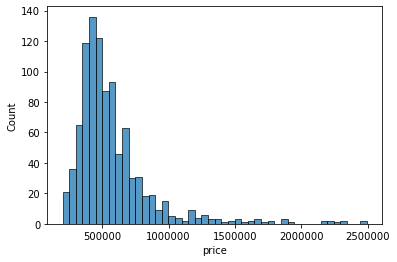

In [113]:
plt.ticklabel_format(style='plain', axis='x')
sb.histplot(data=df, x='price');

In [114]:
df

,price,sqft,address,bd,ba,zip
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828
...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,95608
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,95691
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,95757
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,95758


As we could see, most of out houses have price/sqft ranging from 200 to 400 US Dollar per sqft

## Data Analysis

Questions:

> 1. What zipcode has the highest price?
> 2. How sqft, bd, ba relate to price? and relate to each other 
> 3. Let's say we need to recommend a house for a friend based on his criteria. How do we do that?

#### Price/sqft distribution

Let's create another column named price/sqft

In [115]:
df['price/sqft'] = df['price']/df['sqft']

Now, let's look at the price/sqft distribution

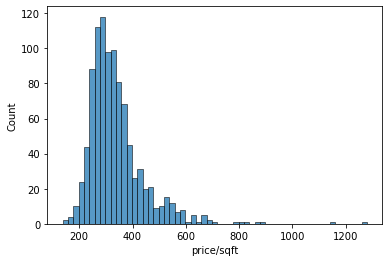

In [116]:
plt.ticklabel_format(style='plain', axis='x')
sb.histplot(data=df, x='price/sqft');

### Price per zipcode 

In [117]:
df['price/sqft'].rank(pct=True)

0       0.468172
1       0.255647
2       0.610883
3       0.496920
4       0.340862
          ...   
1120    0.721766
1121    0.357290
1122    0.154004
1123    0.780287
1124    0.933265
Name: price/sqft, Length: 974, dtype: float64

In [118]:
# pd.options.display.float_format = '{:,.0f}'.format

Let's take a look at out newly created table

In [119]:
zip_code = df[['zip','price/sqft']].groupby('zip').agg(['mean','size'])
zip_code = zip_code[(zip_code['price/sqft']['size'] > 5)]
zip_code = zip_code.sort_values(("price/sqft",'mean'), ascending=False)

In [120]:
zip_code

price/sqft     
             mean size
zip                   
95814  529.910169   10
95819  500.191245   34
95811  491.513196   14
95816  453.356094   29
95818  450.414289   42
95817  396.716184   19
95864  376.814252   36
95820  357.406183   54
95829  347.042524   56
95822  340.771453   44
95831  336.967004   29
95826  334.346567   25
95624  331.708088    7
95833  329.407775   27
95825  317.469051   28
95821  316.600861   32
95842  316.203599   36
95832  313.703661   10
95660  310.913275   21
95838  307.623604   43
95823  305.208401   47
95758  302.326181    6
95824  302.303533   36
95815  300.323189   32
95841  292.667254   19
95834  292.034947   30
95828  291.882949   40
95843  289.316825   43
95827  278.807746   16
95835  270.034083   89

I only show zip_codes which have more than 5 records in our data

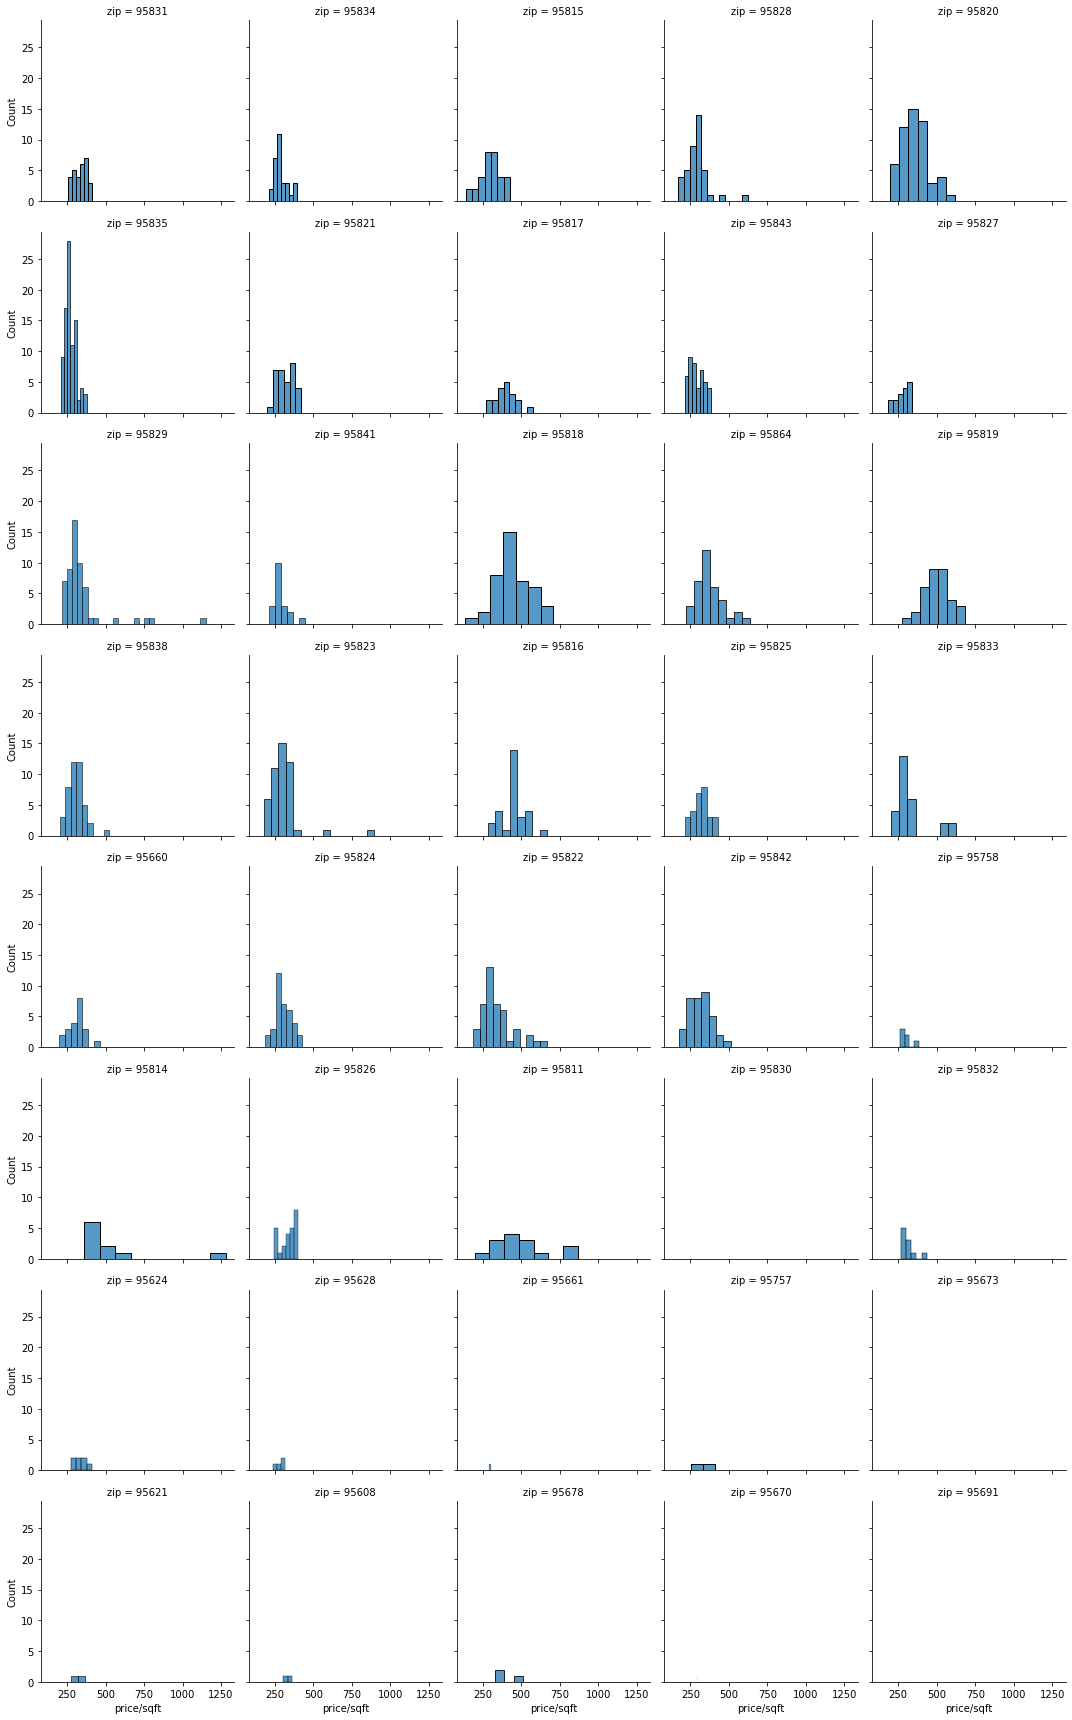

In [121]:
price_zip = sb.FacetGrid(df, col='zip',height=3, col_wrap=5)
price_zip.map_dataframe(sb.histplot, x='price/sqft');

### Price and sqft

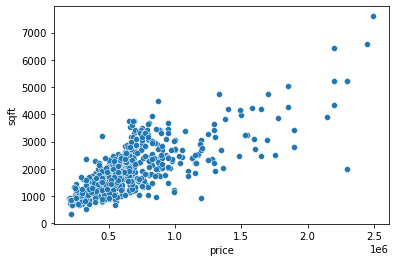

In [122]:
sb.scatterplot(data=df, x='price', y='sqft');

Very reasonable I guess! More sqft means more money!

### bd & ba 

bd and price

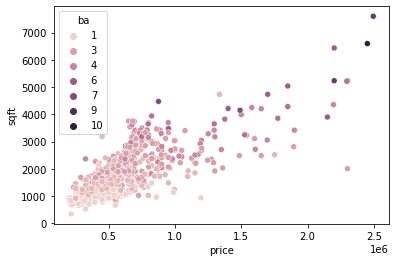

In [123]:
sb.color_palette("viridis", as_cmap=True)
sb.scatterplot(data=df, x='price', y='sqft', hue='ba');

### Basic statistic 

In [124]:
df.describe()

,price,sqft,bd,ba,price/sqft
count,9.740000e+02,974.000000,974.000000,974.000000,974.000000
mean,5.733108e+05,1749.036961,3.233060,2.368583,337.523637
std,3.049457e+05,800.617321,1.000563,1.011079,105.920168
min,1.995000e+05,344.000000,1.000000,1.000000,137.420719
25%,3.998910e+05,1194.500000,3.000000,2.000000,271.510726
50%,4.950000e+05,1555.000000,3.000000,2.000000,314.525050
75%,6.493330e+05,2076.500000,4.000000,3.000000,371.944547
max,2.495000e+06,7600.000000,10.000000,10.000000,1279.443255


### Let's take a look at the heatmap for correlation

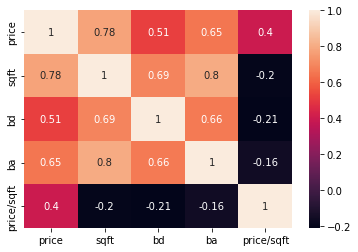

In [125]:
sb.heatmap(df.corr(), annot=True);

## Building a simple recommendation based on criteria

My friend zed wants to find a house in Sacramento. What is the top 10 houses if his criteria is:
- Low price (35% weight) - Best bucket for the sqft (15% weight price/sqft)
- Sqft > 2000 (20% weight)
- Has at least 3 bedrooms and 2 bathrooms (15%)
- In zipcode 95841, 95816 so that he could be closer with his parents (15%)



In [126]:
df_zedd = df

In [127]:
df_zedd

,price,sqft,address,bd,ba,zip,price/sqft
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831,308.277405
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834,271.857329
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834,336.581709
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815,313.653137
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828,286.226686
...,...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,95608,363.566434
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,95691,288.758782
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,95757,253.489848
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,95758,384.310618


In [128]:
# Create another column to check if the number of rooms satisfies Zed's criteria
df_zedd['room_check'] = np.where((df_zedd['bd'] >= 3) & (df_zedd['ba'] >= 2),1,0) 

In [129]:
df_zedd

,price,sqft,address,bd,ba,zip,price/sqft,room_check
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,95831,308.277405,1
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,95834,271.857329,1
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,95834,336.581709,0
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,95815,313.653137,1
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,95828,286.226686,1
...,...,...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,95608,363.566434,1
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,95691,288.758782,0
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,95757,253.489848,1
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,95758,384.310618,1


In [130]:
# Create another column to check if the area of the house satisfies Zed's criteria
df_zedd['sqft_check'] = np.where(df_zedd['sqft'] >= 2000,1,0) 

In [131]:
# To see if the house is in the two zip code 95841 or 95816
df_zedd['closer'] = np.where((df_zedd['zip'] == '95841') | (df_zedd['zip'] == '95816'),1,0) 

### Top 10 houses for Zedd

Low price (35% weight) - Best in value (15% weight price/sqft)
Sqft > 2000 (20% weight)
Has at least 3 bedrooms and 2 bathrooms (15%)
In zipcode 95841, 95816 so that he could be closer with his parents (15%)

In [132]:
df_zedd['composite_score'] = df_zedd['room_check']*0.15 + (1-df['price'].rank(pct=True))*.35 + (1-df['price/sqft'].rank(pct=True))*.15+ df_zedd['sqft_check']*0.2 + df_zedd['closer']*0.15

In [133]:
zed_top_10_house = df_zedd.sort_values(by=['composite_score'], ascending=False).head(10)

Top 10 houses for Zed to pick in Sacramento

In [134]:
zed_top_10_house[["price","sqft","address","bd","ba","price/sqft","composite_score"]]

,price,sqft,address,bd,ba,price/sqft,composite_score
814,325000,2365,"2016 10th St, Sacramento, CA 95818",4,4,137.420719,0.821099
392,399900,2270,"5410 Tyler St, Sacramento, CA 95842",4,3,176.167401,0.759959
1030,299000,1122,"5844 Peppermill Ct #4, Sacramento, CA 95841",3,2,266.488414,0.746638
939,430000,2196,"4590 Perry Ave, Sacramento, CA 95820",3,3,195.810565,0.726797
830,439500,2000,"7380 Putnam Way, Sacramento, CA 95822",3,2,219.750000,0.715298
178,799900,3686,"4823 Graduates Ln, Sacramento, CA 95841",5,3,217.010309,0.686935
1068,475000,2400,"3960 Pasadena Ave, Sacramento, CA 95821",3,2,197.916667,0.686063
1081,480000,2025,"4717 36th St, Sacramento, CA 95820",4,2,237.037037,0.671561
417,389900,1347,"4757 River College Dr, Sacramento, CA 95841",3,2,289.458055,0.670508
816,488800,2067,"2536 47th Ave, Sacramento, CA 95822",3,3,236.477987,0.668634
